<a href="https://colab.research.google.com/github/Vaidehi-Sarag/Multimodel_Dementia/blob/main/Multimodal_Dementia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

CNN MODEL

In [ ]:
!kaggle datasets download -d ninadaithal/imagesoasis

Dataset URL: https://www.kaggle.com/datasets/ninadaithal/imagesoasis
License(s): apache-2.0
100% 1.23G/1.23G [00:06<00:00, 199MB/s]
100% 1.23G/1.23G [00:06<00:00, 213MB/s]


In [ ]:
!ls

imagesoasis.zip  kaggle.json  sample_data


In [ ]:
#extract the file
from zipfile import ZipFile

# dataset='bone-fracture-detection-using-xrays.zip'

dataset = '/content/imagesoasis.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
mild_dementia_files=os.listdir('/content/Data/Mild Dementia')

In [ ]:
moderate_dementia_files=os.listdir('/content/Data/Moderate Dementia')

In [ ]:
very_mild_dementia_files=os.listdir('/content/Data/Very mild Dementia')

In [ ]:
non_dementia_files=os.listdir('/content/Data/Non Demented')

In [ ]:
dementia_files=mild_dementia_files+moderate_dementia_files+very_mild_dementia_files

In [ ]:
# print('Number of mild dementia images:', len(mild_dementia_files))
# print('Number of with moderate dementia images:', len(moderate_dementia_files))
# print('Number of very mild dementia images:', len(very_mild_dementia_files))
print('Number of non dementia images:', len(non_dementia_files))
print('Number of dementia images:', len(dementia_files))

Number of non dementia images: 67222
Number of dementia images: 19215


Creating Labels for the two class of Images

dementia --> 1
non dementia --> 0

In [ ]:
# create the labels

dementia_labels = [1]*19215

non_dementia_lables = [0]*19215


In [ ]:
# print(mild_dementia_labels[0:5])

# print(moderate_dementia_labels[0:5])

# print(very_mild_dementia_labels[0:5])
print(dementia_labels[0:5])

print(non_dementia_lables[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
# print(len(mild_dementia_labels))

# print(len(moderate_dementia_labels))

# print(len(very_mild_dementia_labels))
print(len(dementia_labels))

print(len(non_dementia_lables))

19215
19215


In [ ]:
labels = dementia_labels+non_dementia_lables

print(len(labels))
print(labels[0:5])
print(labels[-5:])

38430
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Image Processing

Resize the Images

Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+
data = []

# Define paths for each category
dementia_paths = [
    '/content/Data/Mild Dementia/',
    '/content/Data/Moderate Dementia/',
    '/content/Data/Very mild Dementia/'
]

# Loop through each dementia path
for dementia_path in dementia_paths:
    for img_file in os.listdir(dementia_path):  # list files in the directory
        image = Image.open(dementia_path + img_file)
        image = image.resize((256, 256))
        image = image.convert('RGB')
        image = np.array(image)
        data.append(image)


non_dementia_path='/content/Data/Non Demented/'

#slicing to get first 19215 images
for img_file in non_dementia_files[:19215]:

  image = Image.open(non_dementia_path + img_file)
  image = image.resize((256,256))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

38430

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
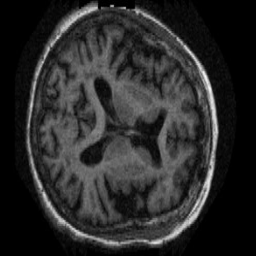

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(256, 256, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(38430, 256, 256, 3)
(38430,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(38430, 256, 256, 3) (30744, 256, 256, 3) (7686, 256, 256, 3)


Building a Convolutional Neural Networks (CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)))#ReLu-Rectified linear Unit
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# Flattens the input data into a 1D array, preparing it for input into the dense layers.
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
# sparse_categorical_crossentropy-It measures the difference between the predicted probability distribution and the true distribution of the labels.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
865/865 [==============================] - 451s 520ms/step - loss: 4.6096 - acc: 0.5951 - val_loss: 0.6020 - val_acc: 0.6540
Epoch 2/5
865/865 [==============================] - 448s 518ms/step - loss: 0.5601 - acc: 0.7054 - val_loss: 0.4802 - val_acc: 0.7789
Epoch 3/5
865/865 [==============================] - 448s 518ms/step - loss: 0.4244 - acc: 0.8041 - val_loss: 0.3355 - val_acc: 0.8641
Epoch 4/5
865/865 [==============================] - 447s 517ms/step - loss: 0.3022 - acc: 0.8718 - val_loss: 0.1889 - val_acc: 0.9255
Epoch 5/5
865/865 [==============================] - 451s 521ms/step - loss: 0.1906 - acc: 0.9244 - val_loss: 0.1269 - val_acc: 0.9554


In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Test Accuracy =', accuracy)

241/241 [==============================] - 23s 94ms/step - loss: 0.1239 - acc: 0.9543
Test Accuracy = 0.9543325304985046


In [ ]:
# Save the model
model.save("my_model.h5")

**SVM MODEL**

In [ ]:
#importing dataset
!kaggle datasets download -d timothyadeyemi/dementia-patient-health-dataset

In [ ]:
!ls

In [ ]:
#extract the file
#from zipfile import ZipFile

dataset ='/content/dementia-patient-health-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')


In [ ]:
# Load the dataset
import pandas as pd

file_path = '/content/dementia_patients_health_data.csv'
data = pd.read_csv(file_path)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
#import numpy as np

In [ ]:
# printing the first 5 rows of the dataframe
data.head()

In [ ]:
data.shape


In [ ]:
data.info()

In [ ]:
# checking for missing values in each column
data.isnull().sum()

Data Preprocessing

In [ ]:
# Handle missing values
data['Prescription'].fillna('None', inplace=True)
data['Dosage in mg'].fillna(data['Dosage in mg'].median(), inplace=True)
data['Chronic_Health_Conditions'].fillna('None', inplace=True)
data.isnull().sum()

In [ ]:
unnecessary_columns = ['Diabetic', 'AlcoholLevel', 'HeartRate', 'BloodOxygenLevel', 'MRI_Delay', 'Age']
data = data.drop(columns=unnecessary_columns)

In [ ]:
# Split the data into features (X) and target (y)
X = data.drop('Dementia', axis=1)
y = data['Dementia']

In [ ]:
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [ ]:
# Preprocessing pipelines for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

In [ ]:
# Save the preprocessor for later use
import joblib
joblib.dump(preprocessor, 'preprocessor.pkl')

Feature Selection

In [ ]:
# Feature Selection for Numerical Data
num_features = X_preprocessed[:, :len(numerical_cols)]
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(num_features, y)
model_lasso = SelectFromModel(lasso, prefit=True)
X_selected_num = model_lasso.transform(num_features)

# Feature Selection for Categorical Data
cat_features = X_preprocessed[:, len(numerical_cols):]
chi2_selector = SelectKBest(chi2, k='all')
X_selected_cat = chi2_selector.fit_transform(cat_features, y)


In [ ]:
# Save the Lasso model
joblib.dump(model_lasso, 'model_lasso.pkl')

In [ ]:
# Save the Chi-Squared selector
joblib.dump(chi2_selector, 'chi2_selector.pkl')

In [ ]:
# Display selected numerical features
selected_numerical_features = numerical_cols[model_lasso.get_support()]
print("Selected Numerical Features:", selected_numerical_features.tolist())

# Display selected numerical features
# Map one-hot encoded features back to their original categorical features
onehot = preprocessor.named_transformers_['cat'].named_steps['onehot']
selected_onehot_features = onehot.get_feature_names_out(categorical_cols)[chi2_selector.get_support()]
selected_categorical_features = np.unique([feature.split('_')[0] for feature in selected_onehot_features])
print("Selected Categorical Features:", selected_categorical_features.tolist())

In [ ]:
# Display not-selected numerical features
not_selected_numerical_features = numerical_cols[~model_lasso.get_support()]
print("Not Selected Numerical Features:", not_selected_numerical_features.tolist())

# Display not-selected numerical features
# Map one-hot encoded features back to their original categorical features
not_selected_onehot_features = onehot.get_feature_names_out(categorical_cols)[~chi2_selector.get_support()]
not_selected_categorical_features = np.unique([feature.split('_')[0] for feature in not_selected_onehot_features])
print("Not Selected Categorical Features:", not_selected_categorical_features.tolist())

In [ ]:
# Combine the selected features
X_selected = np.hstack([X_selected_num, X_selected_cat])

Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

SVM

In [ ]:
svm = SVC(kernel='linear', random_state=42)


In [ ]:
# training the SVM model with training data
svm.fit(X_train, y_train)

Model Evaluation


Accuracy Score

In [ ]:
# accuracy score on training data
X_train_prediction = svm.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)

In [ ]:
# accuracy score for testing data
X_test_prediction = svm.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy score of the test data : ', test_data_accuracy)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
report = classification_report(y_test, X_test_prediction)
print(report)

In [ ]:
# save model
import pickle
filename = 'svm_model.sav'
pickle.dump(svm, open(filename, 'wb'))

User input and prediction system

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.models import load_model
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import pandas as pd

# Load the MRI image model
loaded_image_model = load_model("my_model.h5")

# Load the SVM model and other preprocessors
import joblib
svm = joblib.load("svm_model.sav")
preprocessor = joblib.load("preprocessor.pkl")
model_lasso = joblib.load("model_lasso.pkl")
chi2_selector = joblib.load("chi2_selector.pkl")

# List of numerical columns
numerical_cols = ['BodyTemperature', 'Weight', 'Dosage in mg', 'Cognitive_Test_Scores']

def predict_image(image_path):
    input_image = cv2.imread(image_path)
    input_image_resized = cv2.resize(input_image, (256,256))
    input_image_reshaped = np.reshape(input_image_resized, [1,256,256,3])
    input_prediction = loaded_image_model.predict(input_image_reshaped)
    input_pred_label = np.argmax(input_prediction)
    return 'Dementia' if input_pred_label == 1 else 'No Dementia'

# Create a file upload widget
file_upload = widgets.FileUpload(accept='.jpg,.jpeg,.png')

# Define a function to handle file upload
def on_file_upload(change):
    if file_upload.value:
        file_contents = file_upload.value[next(iter(file_upload.value))]
        with open('uploaded_image.jpg', 'wb') as f:
            f.write(file_contents['content'])
        print('Image uploaded successfully!')
        image_prediction = predict_image('uploaded_image.jpg')
        print("MRI Prediction:", image_prediction)

file_upload.observe(on_file_upload, names='_counter')
display(file_upload)

def predict_dementia_svm(user_input):
    # Convert user input to DataFrame
    user_df = pd.DataFrame([user_input])

    # Preprocess the user input
    user_preprocessed = preprocessor.transform(user_df)

    # Select numerical features
    user_selected_num = model_lasso.transform(user_preprocessed[:, :len(numerical_cols)])

    # Select categorical features
    user_selected_cat = chi2_selector.transform(user_preprocessed[:, len(numerical_cols):])

    # Combine selected features
    user_selected = np.hstack([user_selected_num, user_selected_cat])

    # Make prediction
    prediction = svm.predict(user_selected)
    return "Dementia Positive" if prediction[0] == 1 else "Dementia Negative"

def get_user_input():
    user_input = {}


    # Numerical inputs (as per dataset format)
    user_input['BodyTemperature'] = float(input("Enter Body Temperature (°C): "))
    user_input['Weight'] = float(input("Enter Weight (kg): "))
    user_input['Dosage in mg'] = float(input("Enter Dosage in mg: "))
    user_input['Cognitive_Test_Scores'] = float(input("Enter Cognitive Test Scores: "))

    # Categorical inputs (matching dataset categories)
    user_input['Prescription'] = input("Enter Prescription (e.g., None, Antidepressant, Antipsychotic): ")
    user_input['Education_Level'] = input("Enter Education Level (e.g., Primary, Secondary, College, Graduate): ")
    user_input['Dominant_Hand'] = input("Enter Dominant Hand (e.g., Right, Left): ")
    user_input['Gender'] = input("Enter Gender (e.g., Male, Female): ")
    user_input['Family_History'] = input("Enter Family History of Dementia (Yes/No): ")
    user_input['Smoking_Status'] = input("Enter Smoking Status (e.g., Never, Former, Current): ")
    user_input['APOE_ε4'] = input("Enter APOE ε4 status (e.g., E2/E2, E3/E4, E4/E4): ")
    user_input['Physical_Activity'] = input("Enter Physical Activity Level (e.g., Sedentary, Active, Very Active): ")
    user_input['Depression_Status'] = input("Enter Depression Status (e.g., Yes, No): ")
    user_input['Medication_History'] = input("Enter Medication History (e.g., Antidepressants, Antihypertensives): ")
    user_input['Nutrition_Diet'] = input("Enter Nutrition Diet (e.g., Balanced, High-fat, Low-carb): ")
    user_input['Sleep_Quality'] = input("Enter Sleep Quality (e.g., Poor, Fair, Good): ")
    user_input['Chronic_Health_Conditions'] = input("Enter Chronic Health Conditions (e.g., Diabetes, Hypertension, None): ")

    return user_input

def multimodal_prediction(image_path, user_input):
    image_prediction = predict_image(image_path)
    svm_prediction = predict_dementia_svm(user_input)

    if image_prediction == "Dementia" or svm_prediction == "Dementia Positive":
        final_prediction = "Dementia Positive"
    else:
        final_prediction = "Dementia Negative"

    return final_prediction


user_input = get_user_input()
file_upload.observe(lambda change: print("Final Prediction:", multimodal_prediction('uploaded_image.jpg', user_input)), names='_counter')

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

CNN MODEL

In [ ]:
!kaggle datasets download -d ninadaithal/imagesoasis

Dataset URL: https://www.kaggle.com/datasets/ninadaithal/imagesoasis
License(s): apache-2.0
100% 1.23G/1.23G [00:06<00:00, 199MB/s]
100% 1.23G/1.23G [00:06<00:00, 213MB/s]


In [ ]:
!ls

imagesoasis.zip  kaggle.json  sample_data


In [ ]:
#extract the file
from zipfile import ZipFile

# dataset='bone-fracture-detection-using-xrays.zip'

dataset = '/content/imagesoasis.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
mild_dementia_files=os.listdir('/content/Data/Mild Dementia')

In [ ]:
moderate_dementia_files=os.listdir('/content/Data/Moderate Dementia')

In [ ]:
very_mild_dementia_files=os.listdir('/content/Data/Very mild Dementia')

In [ ]:
non_dementia_files=os.listdir('/content/Data/Non Demented')

In [ ]:
dementia_files=mild_dementia_files+moderate_dementia_files+very_mild_dementia_files

In [ ]:
# print('Number of mild dementia images:', len(mild_dementia_files))
# print('Number of with moderate dementia images:', len(moderate_dementia_files))
# print('Number of very mild dementia images:', len(very_mild_dementia_files))
print('Number of non dementia images:', len(non_dementia_files))
print('Number of dementia images:', len(dementia_files))

Number of non dementia images: 67222
Number of dementia images: 19215


Creating Labels for the two class of Images

dementia --> 1
non dementia --> 0

In [ ]:
# create the labels

dementia_labels = [1]*19215

non_dementia_lables = [0]*19215


In [ ]:
# print(mild_dementia_labels[0:5])

# print(moderate_dementia_labels[0:5])

# print(very_mild_dementia_labels[0:5])
print(dementia_labels[0:5])

print(non_dementia_lables[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
# print(len(mild_dementia_labels))

# print(len(moderate_dementia_labels))

# print(len(very_mild_dementia_labels))
print(len(dementia_labels))

print(len(non_dementia_lables))

19215
19215


In [ ]:
labels = dementia_labels+non_dementia_lables

print(len(labels))
print(labels[0:5])
print(labels[-5:])

38430
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Image Processing

Resize the Images

Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+
data = []

# Define paths for each category
dementia_paths = [
    '/content/Data/Mild Dementia/',
    '/content/Data/Moderate Dementia/',
    '/content/Data/Very mild Dementia/'
]

# Loop through each dementia path
for dementia_path in dementia_paths:
    for img_file in os.listdir(dementia_path):  # list files in the directory
        image = Image.open(dementia_path + img_file)
        image = image.resize((256, 256))
        image = image.convert('RGB')
        image = np.array(image)
        data.append(image)


non_dementia_path='/content/Data/Non Demented/'

#slicing to get first 19215 images
for img_file in non_dementia_files[:19215]:

  image = Image.open(non_dementia_path + img_file)
  image = image.resize((256,256))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

38430

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
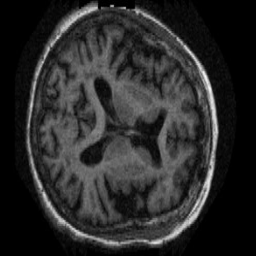

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(256, 256, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(38430, 256, 256, 3)
(38430,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(38430, 256, 256, 3) (30744, 256, 256, 3) (7686, 256, 256, 3)


Building a Convolutional Neural Networks (CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)))#ReLu-Rectified linear Unit
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# Flattens the input data into a 1D array, preparing it for input into the dense layers.
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
# sparse_categorical_crossentropy-It measures the difference between the predicted probability distribution and the true distribution of the labels.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
865/865 [==============================] - 451s 520ms/step - loss: 4.6096 - acc: 0.5951 - val_loss: 0.6020 - val_acc: 0.6540
Epoch 2/5
865/865 [==============================] - 448s 518ms/step - loss: 0.5601 - acc: 0.7054 - val_loss: 0.4802 - val_acc: 0.7789
Epoch 3/5
865/865 [==============================] - 448s 518ms/step - loss: 0.4244 - acc: 0.8041 - val_loss: 0.3355 - val_acc: 0.8641
Epoch 4/5
865/865 [==============================] - 447s 517ms/step - loss: 0.3022 - acc: 0.8718 - val_loss: 0.1889 - val_acc: 0.9255
Epoch 5/5
865/865 [==============================] - 451s 521ms/step - loss: 0.1906 - acc: 0.9244 - val_loss: 0.1269 - val_acc: 0.9554


In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Test Accuracy =', accuracy)

241/241 [==============================] - 23s 94ms/step - loss: 0.1239 - acc: 0.9543
Test Accuracy = 0.9543325304985046


In [ ]:
# Save the model
model.save("my_model.h5")

**SVM MODEL**

In [ ]:
#importing dataset
!kaggle datasets download -d timothyadeyemi/dementia-patient-health-dataset

In [ ]:
!ls

In [ ]:
#extract the file
#from zipfile import ZipFile

dataset ='/content/dementia-patient-health-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')


In [ ]:
# Load the dataset
import pandas as pd

file_path = '/content/dementia_patients_health_data.csv'
data = pd.read_csv(file_path)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
#import numpy as np

In [ ]:
# printing the first 5 rows of the dataframe
data.head()

In [ ]:
data.shape


In [ ]:
data.info()

In [ ]:
# checking for missing values in each column
data.isnull().sum()

Data Preprocessing

In [ ]:
# Handle missing values
data['Prescription'].fillna('None', inplace=True)
data['Dosage in mg'].fillna(data['Dosage in mg'].median(), inplace=True)
data['Chronic_Health_Conditions'].fillna('None', inplace=True)
data.isnull().sum()

In [ ]:
unnecessary_columns = ['Diabetic', 'AlcoholLevel', 'HeartRate', 'BloodOxygenLevel', 'MRI_Delay', 'Age']
data = data.drop(columns=unnecessary_columns)

In [ ]:
# Split the data into features (X) and target (y)
X = data.drop('Dementia', axis=1)
y = data['Dementia']

In [ ]:
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [ ]:
# Preprocessing pipelines for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

In [ ]:
# Save the preprocessor for later use
import joblib
joblib.dump(preprocessor, 'preprocessor.pkl')

Feature Selection

In [ ]:
# Feature Selection for Numerical Data
num_features = X_preprocessed[:, :len(numerical_cols)]
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(num_features, y)
model_lasso = SelectFromModel(lasso, prefit=True)
X_selected_num = model_lasso.transform(num_features)

# Feature Selection for Categorical Data
cat_features = X_preprocessed[:, len(numerical_cols):]
chi2_selector = SelectKBest(chi2, k='all')
X_selected_cat = chi2_selector.fit_transform(cat_features, y)


In [ ]:
# Save the Lasso model
joblib.dump(model_lasso, 'model_lasso.pkl')

In [ ]:
# Save the Chi-Squared selector
joblib.dump(chi2_selector, 'chi2_selector.pkl')

In [ ]:
# Display selected numerical features
selected_numerical_features = numerical_cols[model_lasso.get_support()]
print("Selected Numerical Features:", selected_numerical_features.tolist())

# Display selected numerical features
# Map one-hot encoded features back to their original categorical features
onehot = preprocessor.named_transformers_['cat'].named_steps['onehot']
selected_onehot_features = onehot.get_feature_names_out(categorical_cols)[chi2_selector.get_support()]
selected_categorical_features = np.unique([feature.split('_')[0] for feature in selected_onehot_features])
print("Selected Categorical Features:", selected_categorical_features.tolist())

In [ ]:
# Display not-selected numerical features
not_selected_numerical_features = numerical_cols[~model_lasso.get_support()]
print("Not Selected Numerical Features:", not_selected_numerical_features.tolist())

# Display not-selected numerical features
# Map one-hot encoded features back to their original categorical features
not_selected_onehot_features = onehot.get_feature_names_out(categorical_cols)[~chi2_selector.get_support()]
not_selected_categorical_features = np.unique([feature.split('_')[0] for feature in not_selected_onehot_features])
print("Not Selected Categorical Features:", not_selected_categorical_features.tolist())

In [ ]:
# Combine the selected features
X_selected = np.hstack([X_selected_num, X_selected_cat])

Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

SVM

In [ ]:
svm = SVC(kernel='linear', random_state=42)


In [ ]:
# training the SVM model with training data
svm.fit(X_train, y_train)

Model Evaluation


Accuracy Score

In [ ]:
# accuracy score on training data
X_train_prediction = svm.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)

In [ ]:
# accuracy score for testing data
X_test_prediction = svm.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy score of the test data : ', test_data_accuracy)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
report = classification_report(y_test, X_test_prediction)
print(report)

In [ ]:
# save model
import pickle
filename = 'svm_model.sav'
pickle.dump(svm, open(filename, 'wb'))

User input and prediction system

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.models import load_model
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import pandas as pd

# Load the MRI image model
loaded_image_model = load_model("my_model.h5")

# Load the SVM model and other preprocessors
import joblib
svm = joblib.load("svm_model.sav")
preprocessor = joblib.load("preprocessor.pkl")
model_lasso = joblib.load("model_lasso.pkl")
chi2_selector = joblib.load("chi2_selector.pkl")

# List of numerical columns
numerical_cols = ['BodyTemperature', 'Weight', 'Dosage in mg', 'Cognitive_Test_Scores']

def predict_image(image_path):
    input_image = cv2.imread(image_path)
    input_image_resized = cv2.resize(input_image, (256,256))
    input_image_reshaped = np.reshape(input_image_resized, [1,256,256,3])
    input_prediction = loaded_image_model.predict(input_image_reshaped)
    input_pred_label = np.argmax(input_prediction)
    return 'Dementia' if input_pred_label == 1 else 'No Dementia'

# Create a file upload widget
file_upload = widgets.FileUpload(accept='.jpg,.jpeg,.png')

# Define a function to handle file upload
def on_file_upload(change):
    if file_upload.value:
        file_contents = file_upload.value[next(iter(file_upload.value))]
        with open('uploaded_image.jpg', 'wb') as f:
            f.write(file_contents['content'])
        print('Image uploaded successfully!')
        image_prediction = predict_image('uploaded_image.jpg')
        print("MRI Prediction:", image_prediction)

file_upload.observe(on_file_upload, names='_counter')
display(file_upload)

def predict_dementia_svm(user_input):
    # Convert user input to DataFrame
    user_df = pd.DataFrame([user_input])

    # Preprocess the user input
    user_preprocessed = preprocessor.transform(user_df)

    # Select numerical features
    user_selected_num = model_lasso.transform(user_preprocessed[:, :len(numerical_cols)])

    # Select categorical features
    user_selected_cat = chi2_selector.transform(user_preprocessed[:, len(numerical_cols):])

    # Combine selected features
    user_selected = np.hstack([user_selected_num, user_selected_cat])

    # Make prediction
    prediction = svm.predict(user_selected)
    return "Dementia Positive" if prediction[0] == 1 else "Dementia Negative"

def get_user_input():
    user_input = {}


    # Numerical inputs (as per dataset format)
    user_input['BodyTemperature'] = float(input("Enter Body Temperature (°C): "))
    user_input['Weight'] = float(input("Enter Weight (kg): "))
    user_input['Dosage in mg'] = float(input("Enter Dosage in mg: "))
    user_input['Cognitive_Test_Scores'] = float(input("Enter Cognitive Test Scores: "))

    # Categorical inputs (matching dataset categories)
    user_input['Prescription'] = input("Enter Prescription (e.g., None, Antidepressant, Antipsychotic): ")
    user_input['Education_Level'] = input("Enter Education Level (e.g., Primary, Secondary, College, Graduate): ")
    user_input['Dominant_Hand'] = input("Enter Dominant Hand (e.g., Right, Left): ")
    user_input['Gender'] = input("Enter Gender (e.g., Male, Female): ")
    user_input['Family_History'] = input("Enter Family History of Dementia (Yes/No): ")
    user_input['Smoking_Status'] = input("Enter Smoking Status (e.g., Never, Former, Current): ")
    user_input['APOE_ε4'] = input("Enter APOE ε4 status (e.g., E2/E2, E3/E4, E4/E4): ")
    user_input['Physical_Activity'] = input("Enter Physical Activity Level (e.g., Sedentary, Active, Very Active): ")
    user_input['Depression_Status'] = input("Enter Depression Status (e.g., Yes, No): ")
    user_input['Medication_History'] = input("Enter Medication History (e.g., Antidepressants, Antihypertensives): ")
    user_input['Nutrition_Diet'] = input("Enter Nutrition Diet (e.g., Balanced, High-fat, Low-carb): ")
    user_input['Sleep_Quality'] = input("Enter Sleep Quality (e.g., Poor, Fair, Good): ")
    user_input['Chronic_Health_Conditions'] = input("Enter Chronic Health Conditions (e.g., Diabetes, Hypertension, None): ")

    return user_input

def multimodal_prediction(image_path, user_input):
    image_prediction = predict_image(image_path)
    svm_prediction = predict_dementia_svm(user_input)

    if image_prediction == "Dementia" or svm_prediction == "Dementia Positive":
        final_prediction = "Dementia Positive"
    else:
        final_prediction = "Dementia Negative"

    return final_prediction


user_input = get_user_input()
file_upload.observe(lambda change: print("Final Prediction:", multimodal_prediction('uploaded_image.jpg', user_input)), names='_counter')